## Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load and analysis the dataset 

In [2]:
df=pd.read_csv('loans_data.csv')
df.head(3) #check the first three records of the dataset 

,id,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,653068,150.0,Transportation,India,334.0,43.0,6,female,bullet,2014-01-01
1,653067,200.0,Agriculture,India,334.0,43.0,8,female,bullet,2014-01-01
2,653075,225.0,Agriculture,India,334.0,43.0,7,female,bullet,2014-01-01


In [3]:
df.shape #check the shape

(11237, 10)

In [4]:
len(df[df.duplicated()]) #check whether any duplicate record present

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11237 entries, 0 to 11236
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11237 non-null  int64  
 1   loan_amount         11237 non-null  float64
 2   sector              11237 non-null  object 
 3   country             11237 non-null  object 
 4   partner_id          11237 non-null  float64
 5   term_in_months      11237 non-null  float64
 6   lender_count        11237 non-null  int64  
 7   borrower_genders    11194 non-null  object 
 8   repayment_interval  11237 non-null  object 
 9   date                11237 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 878.0+ KB


In [6]:
df.isnull().sum() #check the null count in each column

id                     0
loan_amount            0
sector                 0
country                0
partner_id             0
term_in_months         0
lender_count           0
borrower_genders      43
repayment_interval     0
date                   0
dtype: int64

In [7]:
df.dropna(inplace=True) 

In [8]:
df.shape

(11194, 10)

In [9]:
df.describe(include='all')

,id,loan_amount,sector,country,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,date
count,1.119400e+04,11194.000000,11194,11194,11194.000000,11194.000000,11194.000000,11194,11194,11194
unique,NaN,NaN,15,1,NaN,NaN,NaN,32,3,837
top,NaN,NaN,Agriculture,India,NaN,NaN,NaN,female,bullet,2017-05-10
freq,NaN,NaN,3407,11194,NaN,NaN,NaN,7562,6532,66
mean,1.009799e+06,592.627747,NaN,NaN,348.918885,31.710559,17.968287,NaN,NaN,NaN
std,2.052747e+05,734.232526,NaN,NaN,75.979289,13.497121,22.670216,NaN,NaN,NaN
min,6.530660e+05,25.000000,NaN,NaN,212.000000,3.000000,0.000000,NaN,NaN,NaN
25%,8.226518e+05,250.000000,NaN,NaN,242.000000,15.000000,7.000000,NaN,NaN,NaN
50%,1.012212e+06,325.000000,NaN,NaN,334.000000,43.000000,10.000000,NaN,NaN,NaN
75%,1.203340e+06,550.000000,NaN,NaN,428.000000,43.000000,17.000000,NaN,NaN,NaN


In [10]:
df['country'].value_counts()

India    11194
Name: country, dtype: int64

In [11]:
df.drop(['id','partner_id','country','borrower_genders','date'],axis=1,inplace=True) #drop redundant columns

In [12]:
df.head(3)

,loan_amount,sector,term_in_months,lender_count,repayment_interval
0,150.0,Transportation,43.0,6,bullet
1,200.0,Agriculture,43.0,8,bullet
2,225.0,Agriculture,43.0,7,bullet


In [13]:
df.columns

Index(['loan_amount', 'sector', 'term_in_months', 'lender_count',
       'repayment_interval'],
      dtype='object')

In [14]:
df['sector'].value_counts() #check the number of values of each sector

Agriculture       3407
Food              1925
Housing           1286
Services          1050
Arts               791
Retail             694
Education          560
Clothing           523
Personal Use       315
Manufacturing      288
Transportation     172
Construction       131
Health              43
Entertainment        5
Wholesale            4
Name: sector, dtype: int64

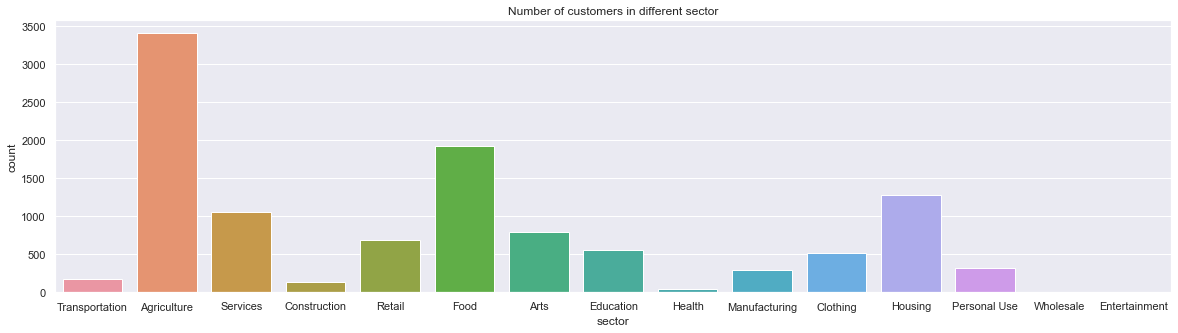

In [15]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(data=df,x='sector')
plt.title('Number of customers in different sector')
plt.show()

In [16]:
df['repayment_interval'].value_counts() ##check the number of values of repayment interval

bullet       6532
monthly      4652
irregular      10
Name: repayment_interval, dtype: int64

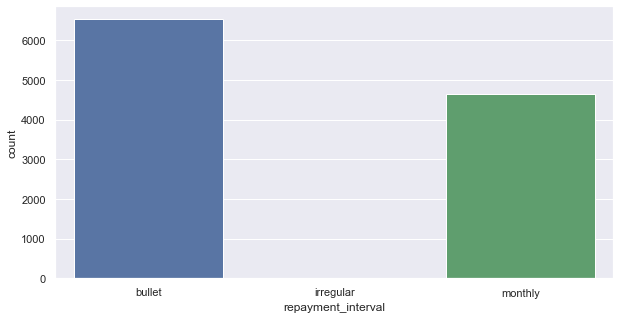

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(data=df,x='repayment_interval')
plt.show()

In [18]:
df=df[df['repayment_interval']!='irregular']
df.shape

(11184, 5)

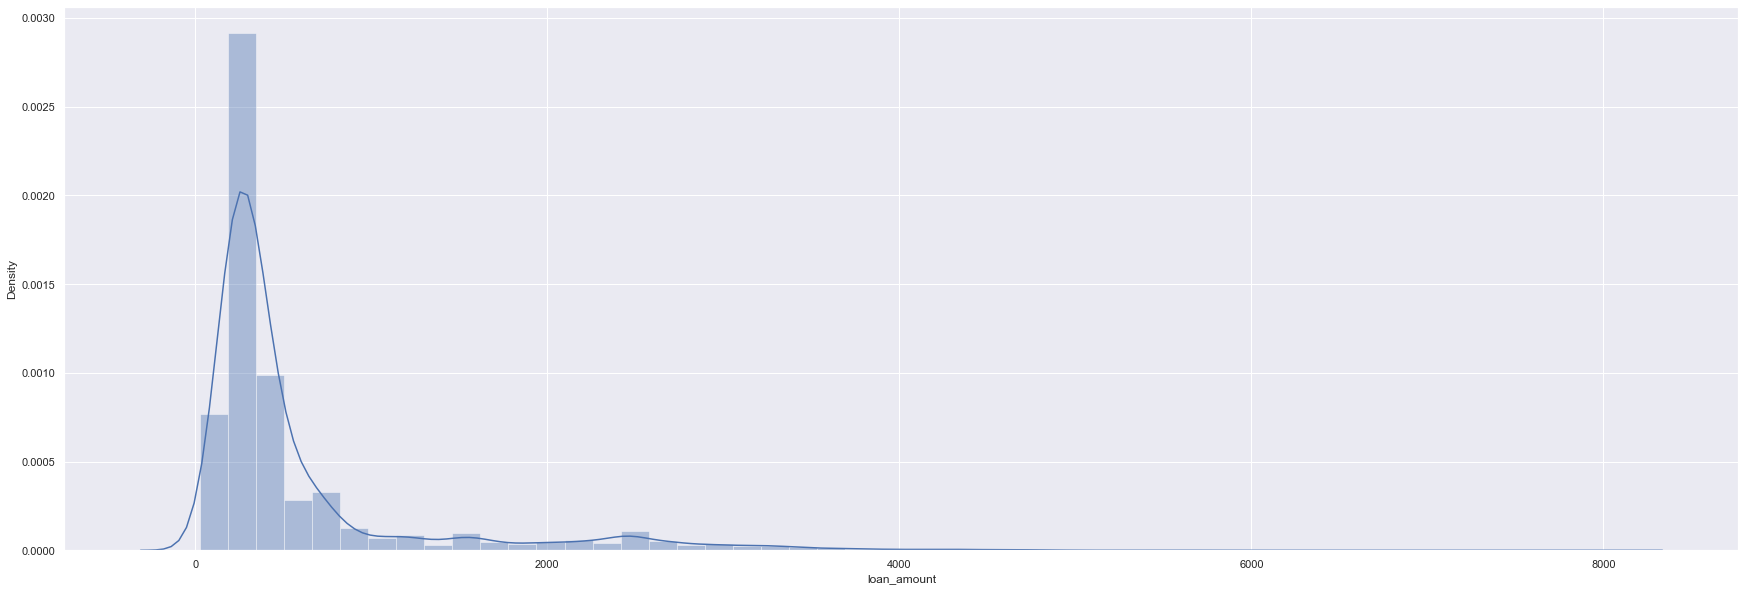

In [19]:
sns.set(rc={'figure.figsize':(30,10)})
sns.distplot(df['loan_amount'])
plt.show()

In [20]:
df['loan_amount'].value_counts()

250.0     1244
300.0     1126
325.0     1117
225.0      844
175.0      611
          ... 
3775.0       1
3525.0       1
5375.0       1
4150.0       1
8000.0       1
Name: loan_amount, Length: 185, dtype: int64

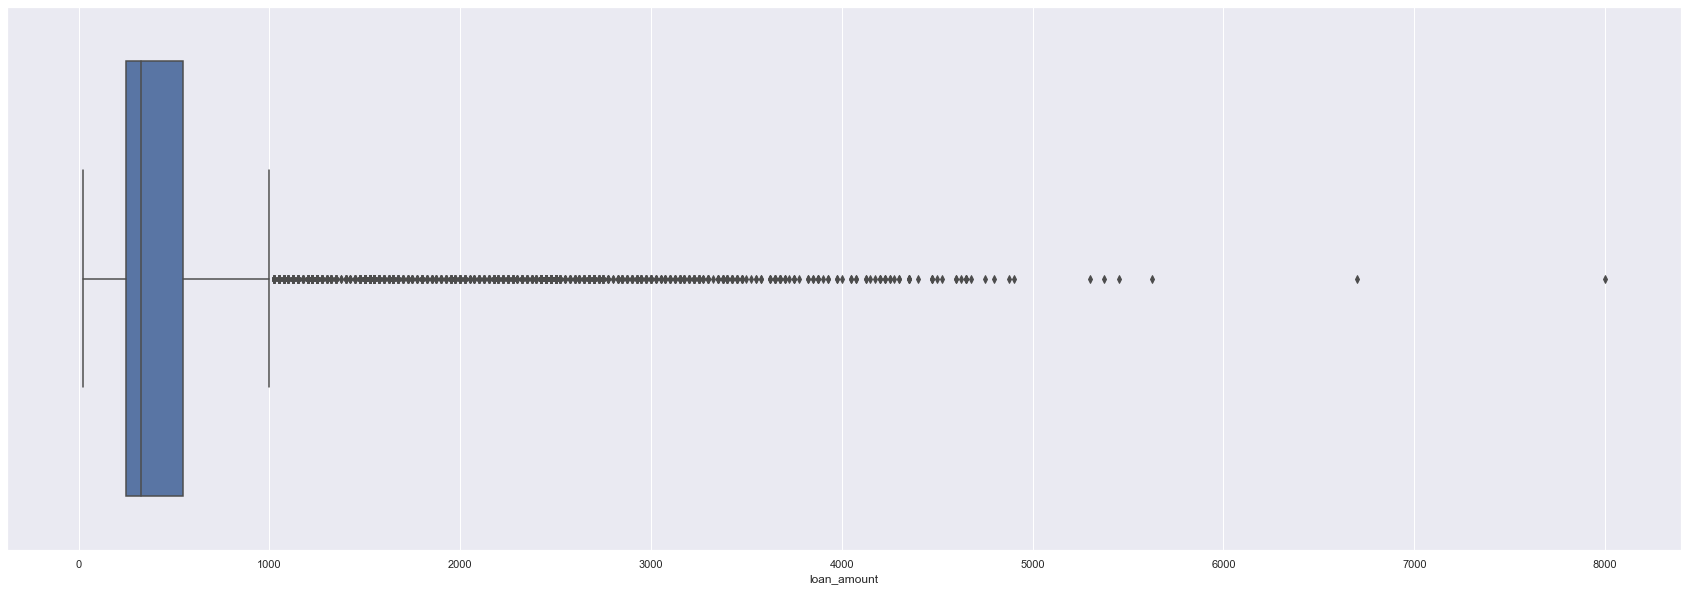

In [21]:
sns.boxplot(data=df,x='loan_amount')
plt.show()

In [22]:
df=df[df['loan_amount']<6000]
df.shape

(11182, 5)

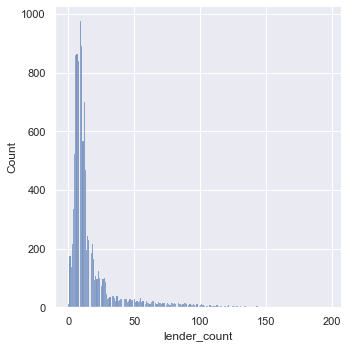

In [23]:
sns.displot(df['lender_count'])
plt.show()

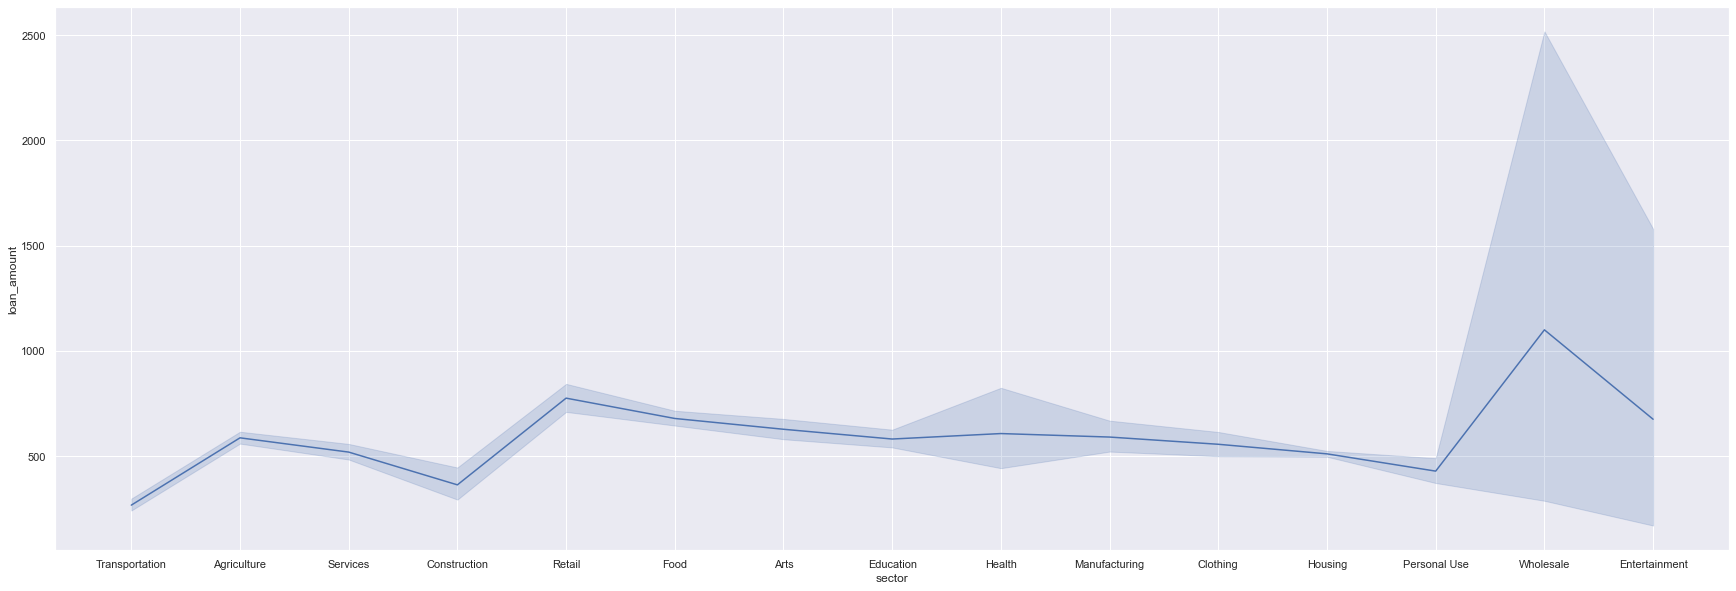

In [24]:
sns.lineplot(data=df,x='sector',y='loan_amount')
plt.show()

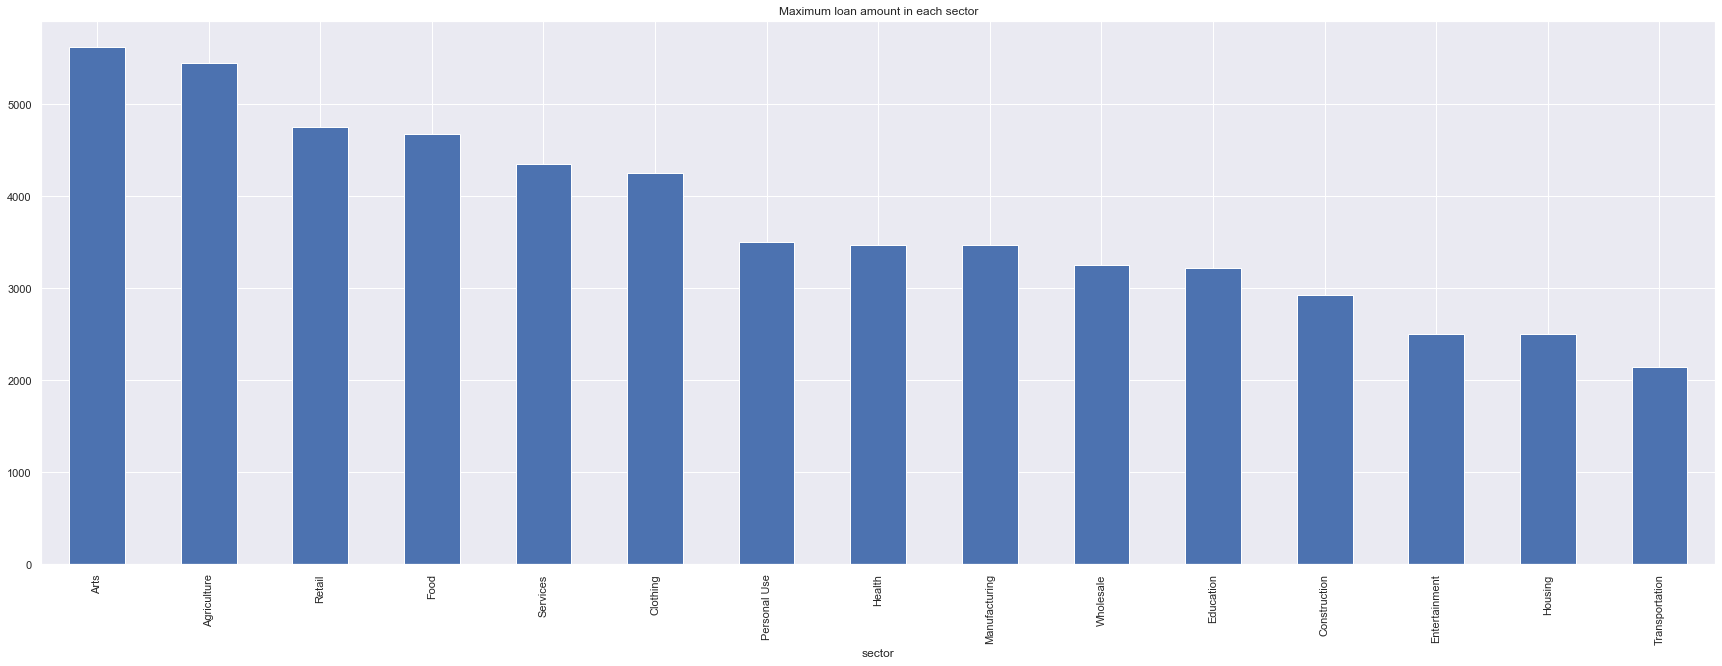

In [25]:
df.groupby(df['sector'])['loan_amount'].max().sort_values(ascending=False).plot(kind='bar')
plt.title('Maximum loan amount in each sector')
plt.show()

In [26]:
df.columns

Index(['loan_amount', 'sector', 'term_in_months', 'lender_count',
       'repayment_interval'],
      dtype='object')

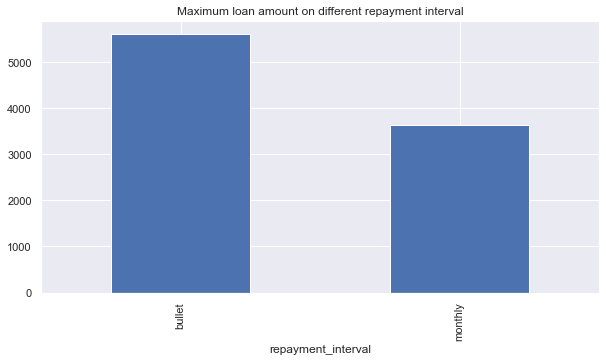

In [27]:
sns.set(rc={'figure.figsize':(10,5)})
df.groupby(df['repayment_interval'])['loan_amount'].max().plot(kind='bar')
plt.title('Maximum loan amount on different repayment interval')
plt.show()

In [28]:
df=pd.get_dummies(df,columns=['sector','repayment_interval'],drop_first=True) #one hot encoding the categorical features

In [29]:
df.head(3)

,loan_amount,term_in_months,lender_count,sector_Arts,sector_Clothing,sector_Construction,sector_Education,sector_Entertainment,sector_Food,sector_Health,sector_Housing,sector_Manufacturing,sector_Personal Use,sector_Retail,sector_Services,sector_Transportation,sector_Wholesale,repayment_interval_monthly
0,150.0,43.0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,200.0,43.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,225.0,43.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
df.shape

(11182, 18)

## Model building and Evaluation 

In [31]:
X=df.drop('loan_amount',axis=1)
Y=df['loan_amount'] #store the dependent and independent variables in Y and X respectively

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=42) #split the dataset into training and testing
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(7827, 17) (3355, 17) (7827,) (3355,)


In [34]:
lr=LinearRegression()

In [35]:
lr.fit(X_train,Y_train)

LinearRegression()

In [36]:
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

In [37]:
print('Train R2-score:',r2_score(Y_train,Y_train_pred))
print('Test R2-score:',r2_score(Y_test,Y_test_pred))

Train R2-score: 0.8422478107816672
Test R2-score: 0.8405972640635635


## Conclusion 

- The model is not underfitting and the train and test R2 score are almost same so the model does not seem to be overfit as well.